In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=pd.read_csv (r'N:\IITM\Finance Club\TATASTEEL - Sheet1.csv')

In [3]:
a["fast"]=""
a["slow"]=""
for i in range(7,8625):
    a.fast[i]=np.mean(a.close[i-7:i])
for i in range(20,8625):
    a.slow[i]=np.mean(a.close[i-20:i])

C:\Users\91960\AppData\Local\Temp/ipykernel_18468/2580861067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.fast[i]=np.mean(a.close[i-7:i])
C:\Users\91960\AppData\Local\Temp/ipykernel_18468/2580861067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.slow[i]=np.mean(a.close[i-20:i])


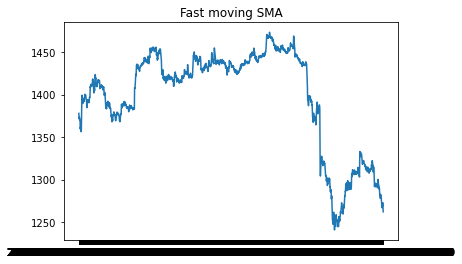

In [10]:
plt.plot(a.timestamp[7:8625],a.fast[7:8625])
plt.title("Fast moving SMA")
plt.show()

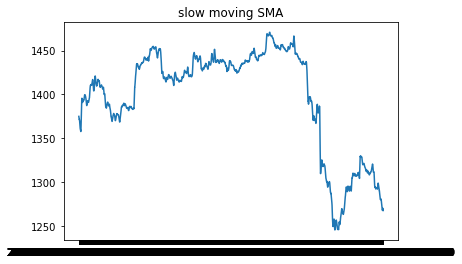

In [11]:
plt.plot(a.timestamp[20:8625],a.slow[20:8625])
plt.title("slow moving SMA")
plt.show()

In [6]:
a["profit"]=""
a["minu"]=""
a["hrs"]=""
a["s1"]=""

In [7]:
for i in range(0,8625):
    a.minu[i]=int(a.timestamp[i][14:16])
    a.hrs[i]=int(a.timestamp[i][11:13])
    a.s1[i]=2*(a.high[i]+a.low[i]+a.close[i])/3-a.high[i]

C:\Users\91960\AppData\Local\Temp/ipykernel_18468/412081516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.minu[i]=int(a.timestamp[i][14:16])
C:\Users\91960\AppData\Local\Temp/ipykernel_18468/412081516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.hrs[i]=int(a.timestamp[i][11:13])
C:\Users\91960\AppData\Local\Temp/ipykernel_18468/412081516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.s1[i]=2*(a.high[i]+a.low[i]+

In [9]:
cond=0
k=0
t=0
a.stock=np.zeros(8625)
a.profit=np.zeros(8625)
for i in range(20,8625):
    t=100*a.hrs[i]+a.minu[i]
    if(a.stock[i-1]==0 and t>=925 and t<=1514):
        if(a.close[i]>a.s1[i-1] and a.close[i]>a.slow[i]): 
            cond=1
            k=i
    if(a.stock[i-1]==1):
        p=(a.close[i]-a.close[k])/a.close[k]
        if(t>=1515):
            cond=0
            a.profit[i]=a.close[i]-a.close[k]
        elif(p>0.01 or p<-0.005):
            cond=0
            a.profit[i]=a.close[i]-a.close[k]                
        elif(a.close[i]<a.s1[i-1] and a.close[i]<a.slow[i]):
            cond=0
            a.profit[i]=a.close[i]-a.close[k]
            #if(time):               
    a.stock[i]=cond
if(np.sum(a.profit<0)):
    print("total loss  =",-1*np.sum(a.profit))
elif(np.sum(a.profit>0)):
    print("total profit  =",np.sum(a.profit))
else:
    print("Not a loss nor Gain")

C:\Users\91960\AppData\Local\Temp/ipykernel_18468/3032251926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.profit[i]=a.close[i]-a.close[k]
C:\Users\91960\AppData\Local\Temp/ipykernel_18468/3032251926.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.profit[i]=a.close[i]-a.close[k]
C:\Users\91960\AppData\Local\Temp/ipykernel_18468/3032251926.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.profit[i]=a.close[i]-a.clos

total loss  = 181.70000000000073
